## Setup

In [64]:
# Loading packages and their components
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [30]:
# Matplotlib configuration
plt.rcParams['figure.figsize'] = [15, 7]

## Loading the data

In [21]:
data_subsets = pickle.load(open('cleaned_data.pickle', 'rb'))

In [22]:
# Splitting the data into their parts
sj_features_train, \
sj_features_test, \
sj_labels_train, \
iq_features_train, \
iq_features_test, \
iq_labels_train = data_subsets

In [23]:
def rem_col(df, col):
    '''
    Removes columns from a dataframe that contain a string.
    '''
    return df.loc[:,~df.columns.str.contains(col)]

In [24]:
def rem_cols(df, cols):
    '''
    Removes multiple columns from a dataframe that contain a string in a given list.
    '''
    for colname in cols:
        df = df.loc[:,~df.columns.str.contains(colname)]
    return df

In [51]:
# For the exploratory part
sj_train = (
    sj_features_train.join(sj_labels_train, rsuffix='_drop')
    .pipe(rem_col, '_drop')
    .pipe(pd.DataFrame.drop, ['city',
                              'year',
                              'weekofyear'
                             ], axis=1)
)      

In [102]:
def std_scaler(df):
    '''
    Sklearn StandardScaler applied to a pandas dataframe for the use with method chaining.
    '''
    colnames = df.columns.to_list()
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    return df

/home/mario/neuefische/DenguePred/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


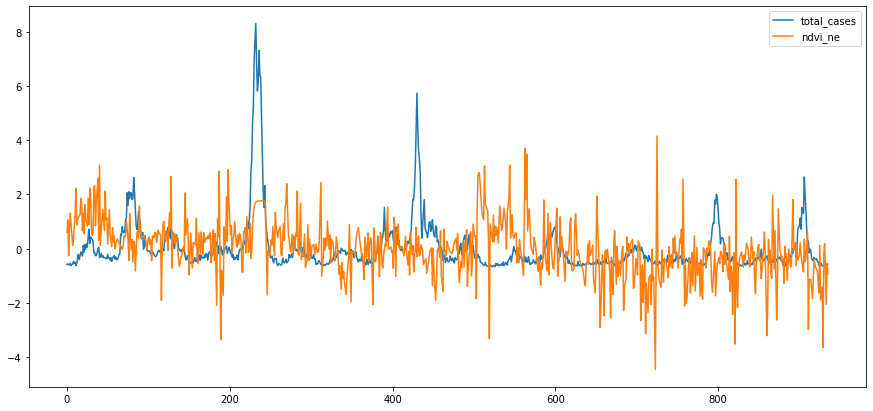

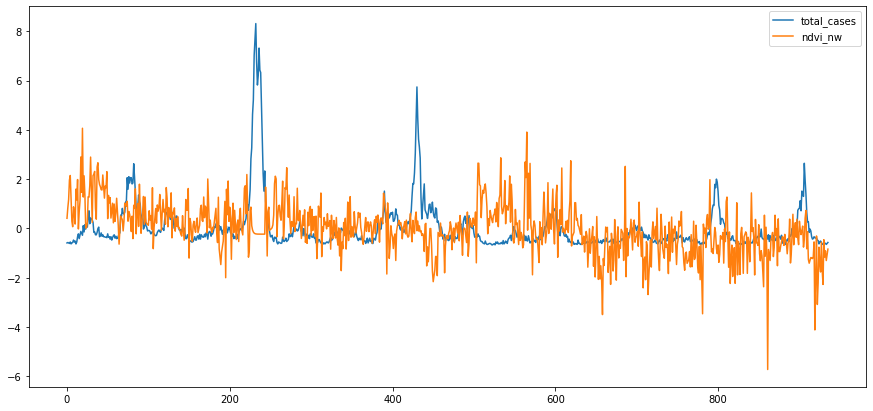

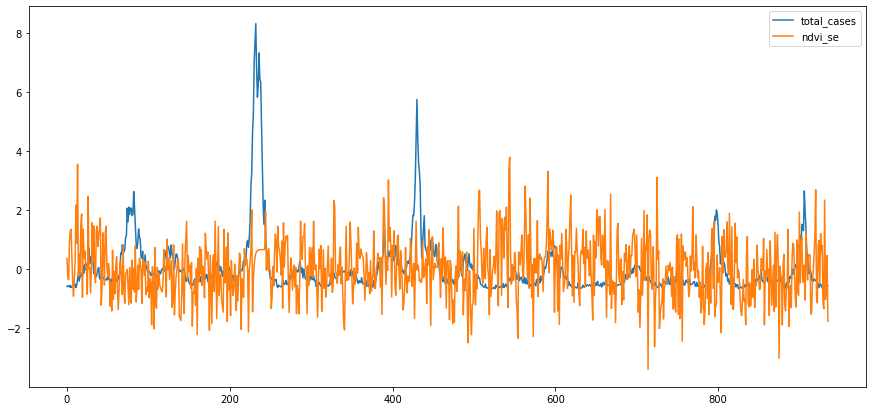

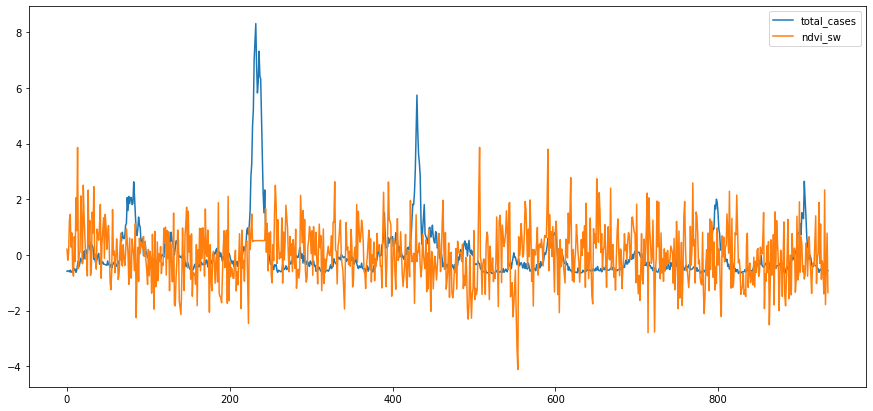

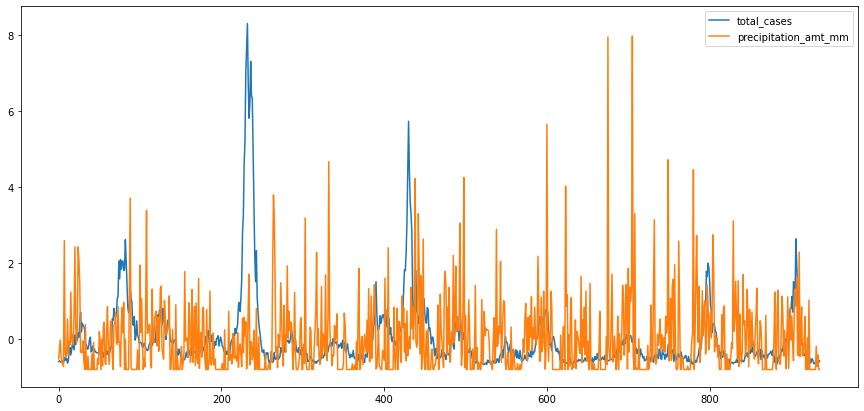

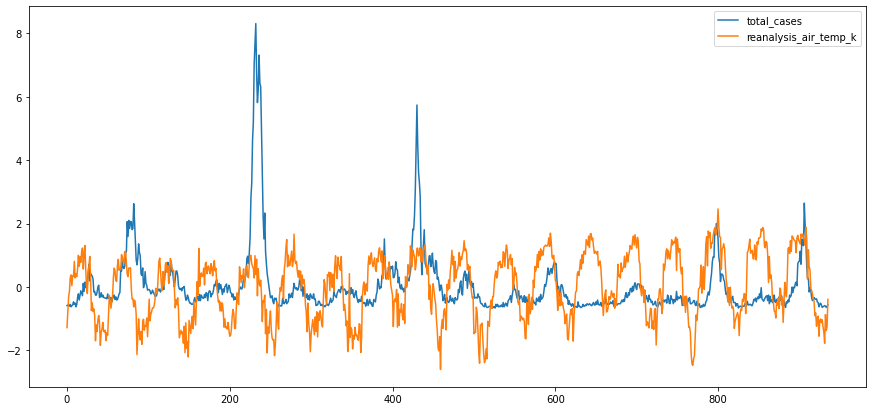

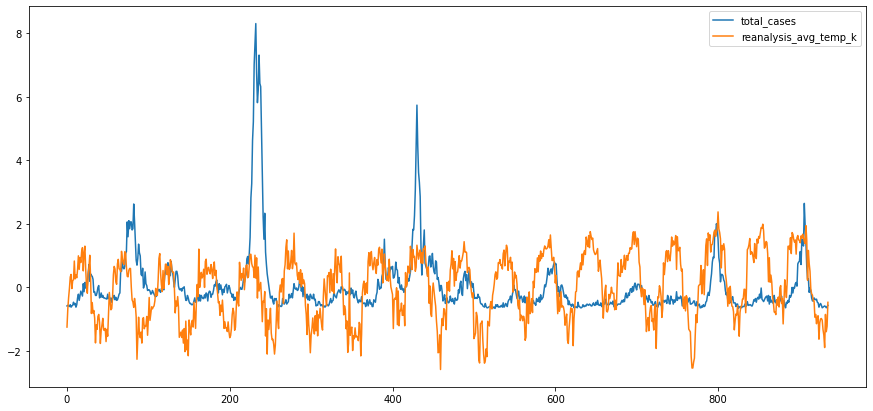

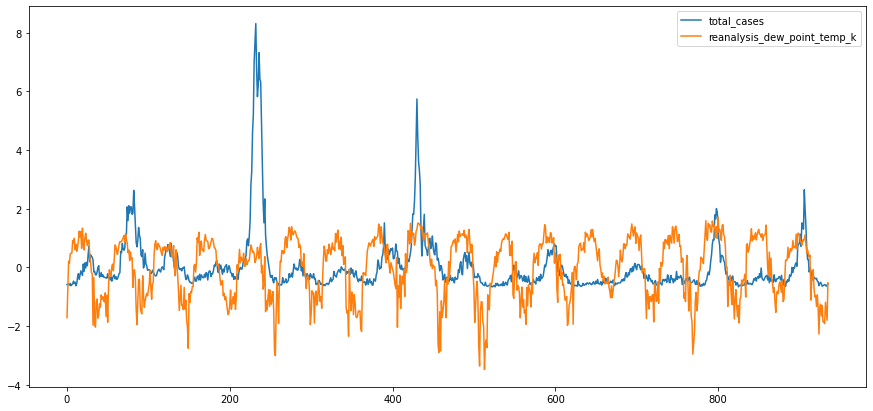

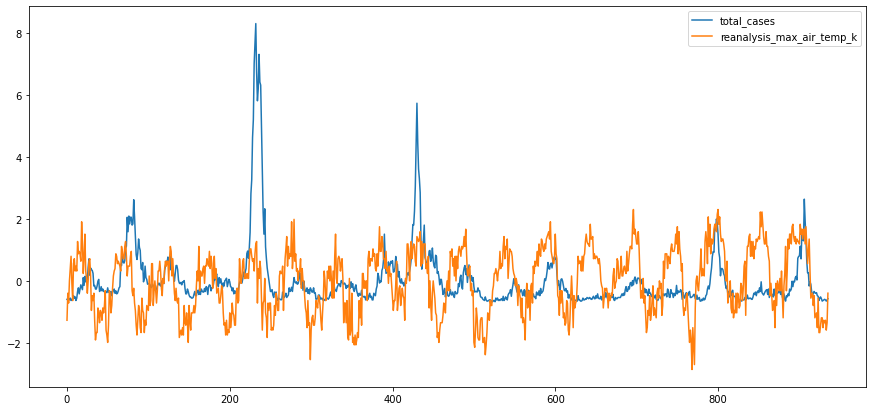

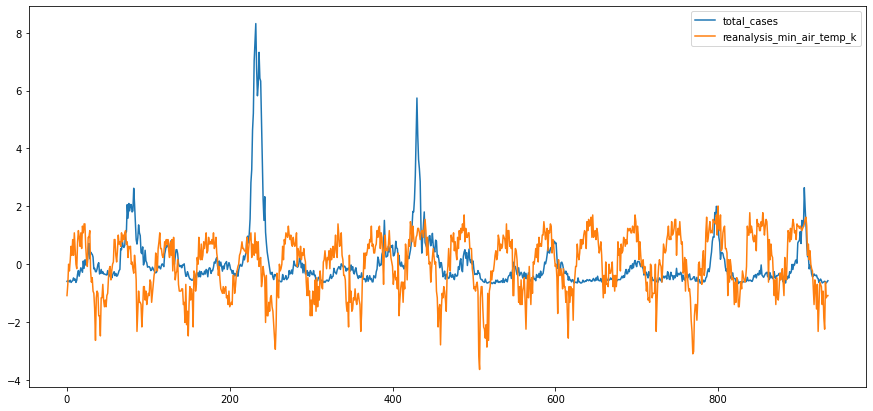

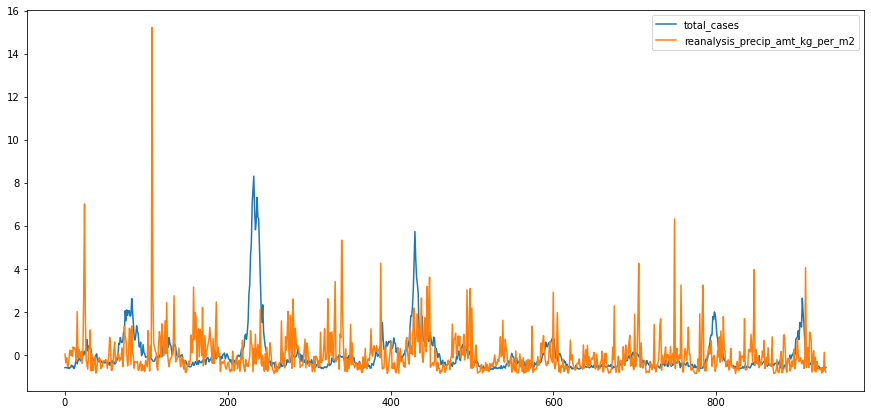

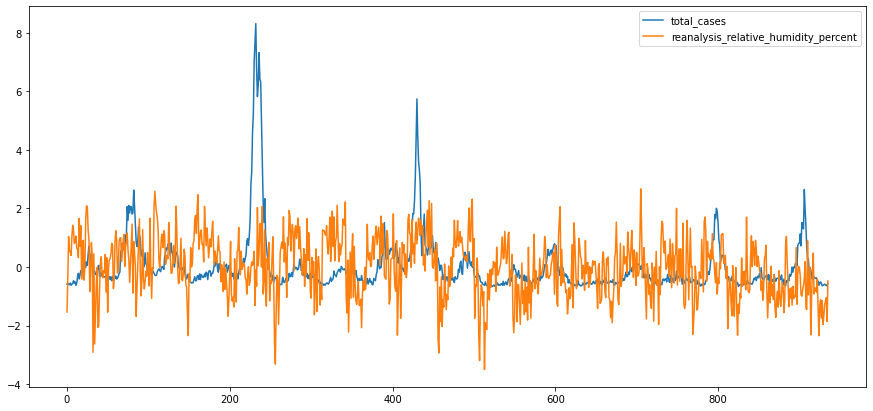

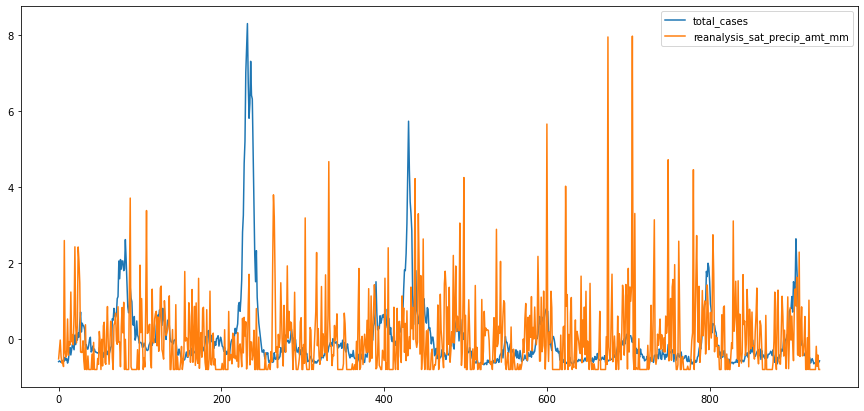

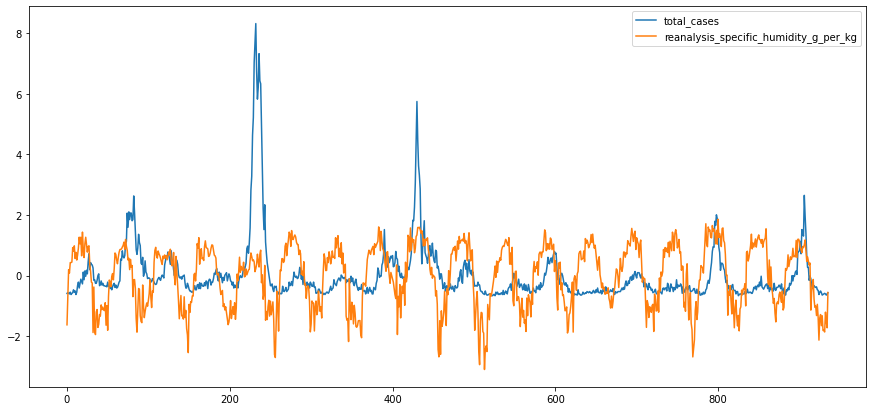

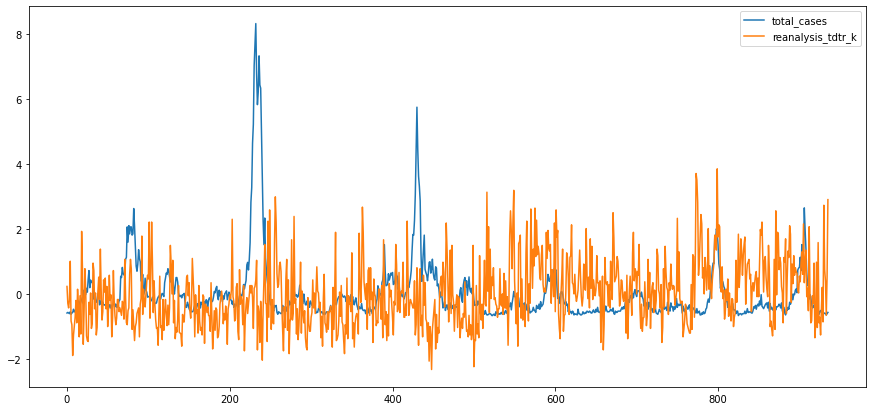

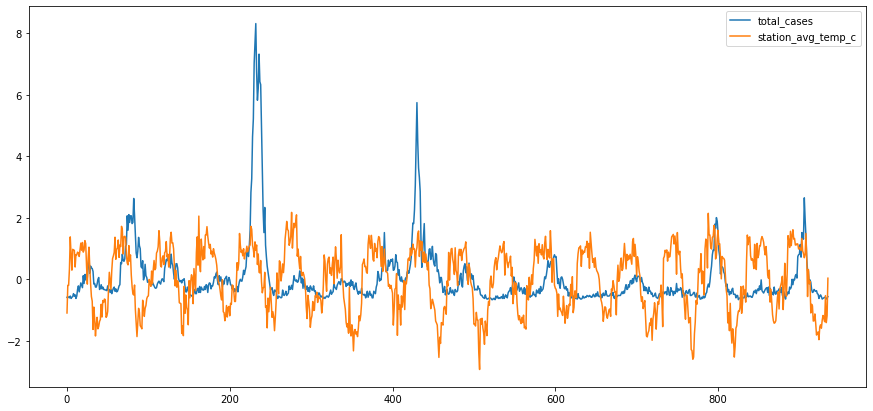

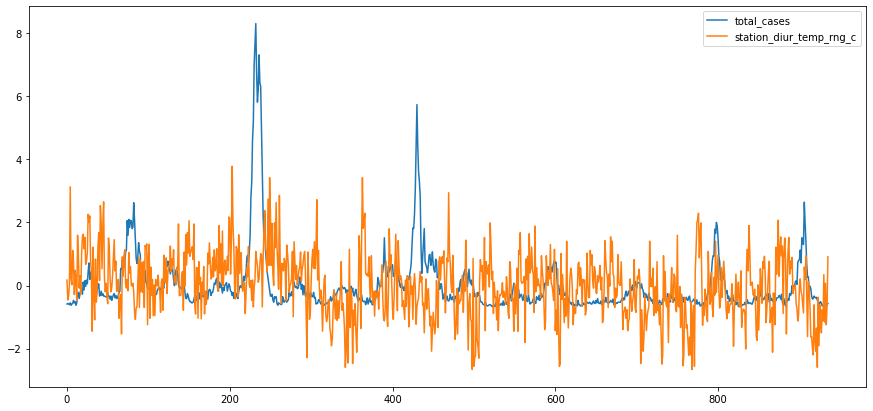

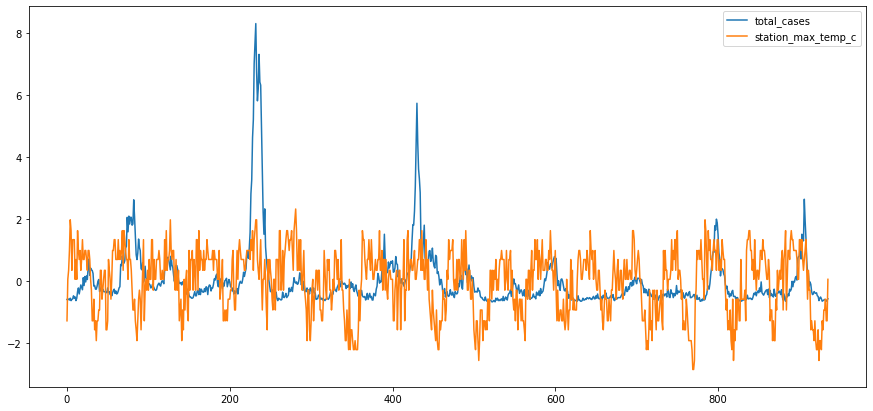

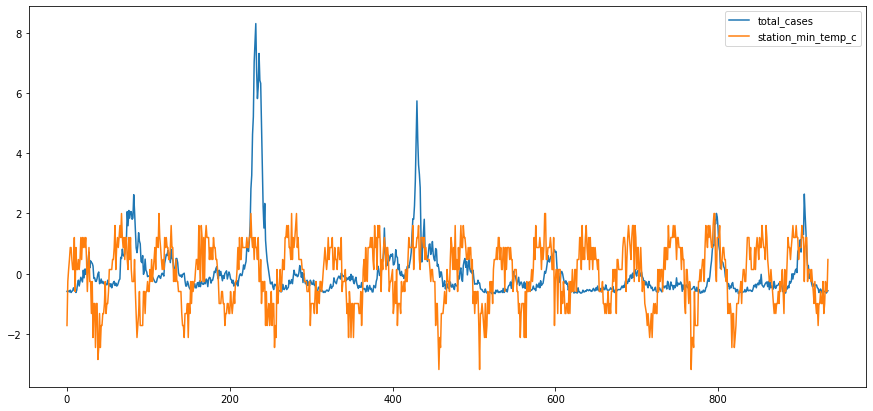

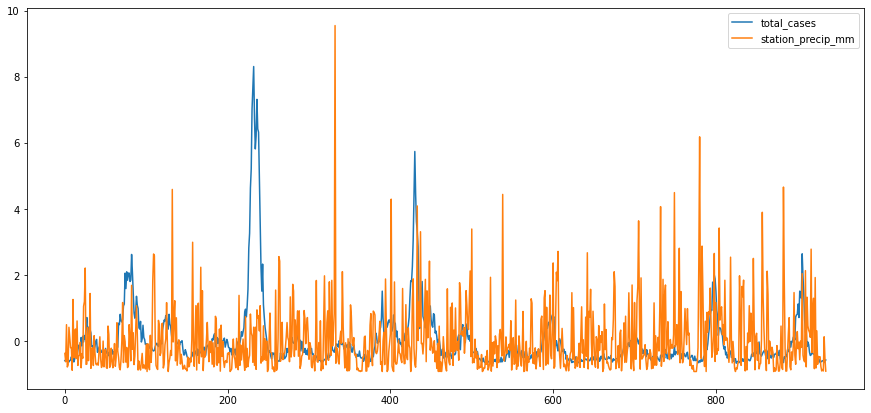

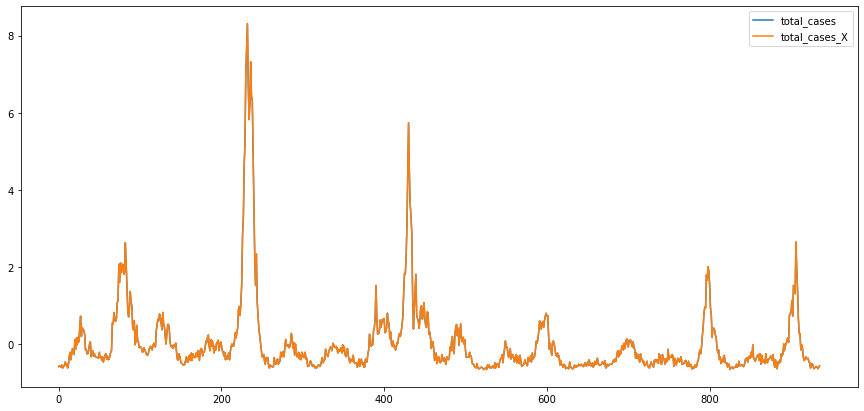

In [105]:
for var in sj_train.columns:
    (
        pd.DataFrame(sj_train.total_cases)
        .join(sj_train[var], rsuffix='_X')
        .pipe(std_scaler)
        .plot()
    )

In [106]:
g = sns.FacetGrid(
    sj_features_train.join(sj_labels_train, rsuffix='_drop')
    .pipe(rem_col, '_drop') # dropping the doubled columns
    .pipe(pd.DataFrame.drop, ['city',
                              'year',
                              'weekofyear'
                             ], axis=1),
    col=
)

SyntaxError: invalid syntax (1719540834.py, line 9)

In [ ]:
sj_labels_train.total_cases.plot();

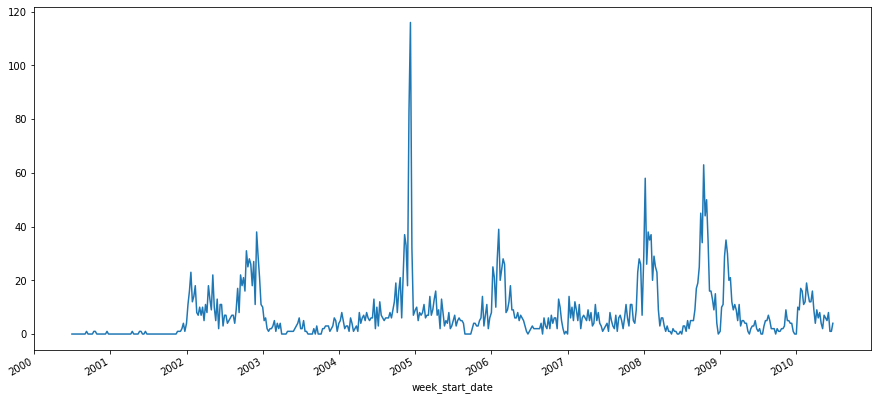

In [31]:
iq_labels_train.total_cases.plot();

In [19]:
iq_features_train.head(10)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
2000-07-01,iq,2000,26,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
2000-07-08,iq,2000,27,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
2000-07-15,iq,2000,28,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
2000-07-22,iq,2000,29,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
2000-07-29,iq,2000,30,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0
2000-08-05,iq,2000,31,0.205529,0.190757,0.231671,0.255314,16.24,297.191429,298.285714,...,1.00,74.728571,16.24,13.421429,13.771429,25.340000,10.940000,32.0,17.0,11.5
2000-08-12,iq,2000,32,0.312486,0.329986,0.380586,0.387271,89.37,297.320000,298.978571,...,26.68,83.275714,89.37,15.311429,11.471429,27.016667,11.650000,34.0,19.9,72.9
2000-08-19,iq,2000,33,0.384133,0.392240,0.341780,0.382750,42.08,297.627143,299.335714,...,16.90,82.490000,42.08,15.465714,13.700000,26.583333,10.316667,33.0,20.5,50.1
2000-08-26,iq,2000,34,0.408157,0.322157,0.406714,0.302714,49.22,298.238571,299.571429,...,5.59,74.740000,49.22,14.444286,13.771429,26.900000,13.400000,34.0,19.0,89.2
